# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [22]:
import pandas as pd
import numpy as np
import os
import yfinance as yf

# Define folder paths relative to this notebook
raw_dir = 'data/raw'
processed_dir = 'data/processed'

# Create folders if they don't exist
os.makedirs(raw_dir, exist_ok=True)
os.makedirs(processed_dir, exist_ok=True)

# Download DIS stock data from 2020-01-01
ticker = "DIS"
df = yf.download(ticker, start="2020-01-01")
df = df.reset_index()

# drop the ticker row
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.droplevel(1)  

# Save to CSV in raw data folder
csv_path = os.path.join(raw_dir, 'DIS stock price.csv')
if not os.path.exists(csv_path):
    df.to_csv(csv_path, index=False)
    print(f'Synthetic dataset with two columns created and saved to {csv_path}')
else:
    print(f'File already exists at {csv_path}. Skipping CSV creation to avoid overwrite.')

df.head()


[*********************100%***********************]  1 of 1 completed

Synthetic dataset with two columns created and saved to data/raw/DIS stock price.csv


Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,145.769897,145.769897,142.720739,142.907610,9502100
1,2020-01-03,144.097794,145.474831,143.655175,143.999427,7320200
2,2020-01-06,143.261734,143.635508,141.943710,143.153537,8262500
3,2020-01-07,143.310898,144.461711,143.035490,143.596151,6906500
4,2020-01-08,143.015823,143.733864,142.445347,143.104359,6984200


## Implement 2 engineered features

In [28]:
# Calculate daily log returns using Adj Close
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

os.makedirs("data/processed", exist_ok=True)

# Save to CSV
output_path = "data/processed/DIS_with_log_return.csv"
df.to_csv(output_path, index=False)

print(f"Saved to {output_path}")
df[['Date', 'Close', 'log_return']].head()


Saved to data/processed/DIS_with_log_return.csv


Price,Date,Close,log_return
0,2020-01-02,145.769897,NaN
1,2020-01-03,144.097794,-0.011537
2,2020-01-06,143.261734,-0.005819
3,2020-01-07,143.310898,0.000343
4,2020-01-08,143.015823,-0.002061


### Rationale for Log returns
Log returns give an analytic view of a stock compared to the dollar amount. It has time-additivity, meaning we can sum the log returns of different periods to find the total return for a longer period, simplifying complex calculations for multi-period analysis. 

In [34]:
# Calculate 21-day rolling (monthly) volatility, annualized
df['volatility_21d_ann'] = (
    df['log_return']
    .rolling(window=21)
    .std()
    * np.sqrt(252)
)

# Save to CSV
output_path = "data/processed/DIS_21d_volatility.csv"
df.to_csv(output_path, index=False)

print(f"Saved to {output_path}")

df[['Date', 'log_return', 'volatility']].head()

Saved to data/processed/DIS_21d_volatility.csv


Price,Date,log_return,volatility
0,2020-01-02,NaN,NaN
1,2020-01-03,-0.011537,NaN
2,2020-01-06,-0.005819,NaN
3,2020-01-07,0.000343,NaN
4,2020-01-08,-0.002061,NaN


### Rationale for Volatility
Volatility (standard deviation of returns) is the most common proxy for risk in finance. It can help investors compare stocks not just by return but by risk-adjusted performance.

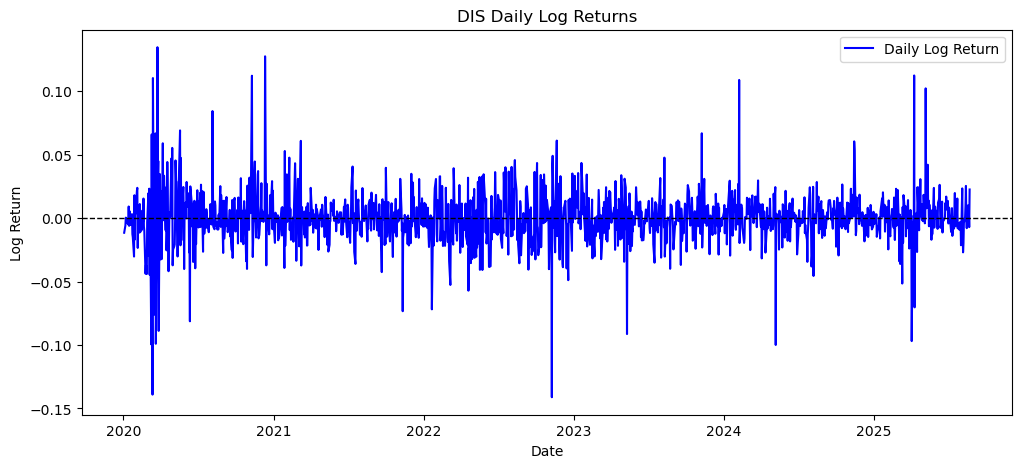

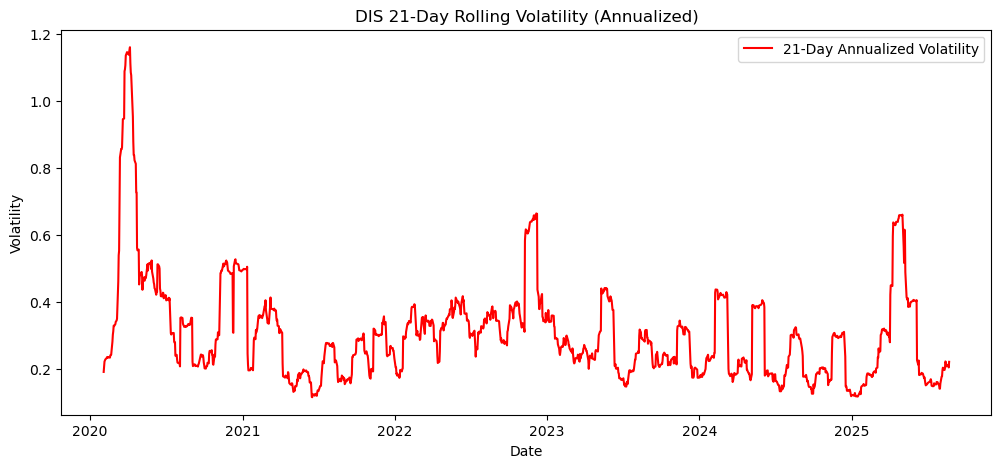

In [39]:
import matplotlib.pyplot as plt

# Plot Date vs Log Return
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['log_return'], label="Daily Log Return", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("DIS Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.show()

# Plot Date vs Volatility
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['volatility_21d_ann'], label="21-Day Annualized Volatility", color='red')
plt.title("DIS 21-Day Rolling Volatility (Annualized)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()
